# <center>Estudo sobre o algoritmo de Árvore de Decisão em Series Temporais </center>

## 1. Entendendo o algoritmo

* Árvores de Decisão (DTs) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão.   
O objetivo é criar um modelo que preveja o valor de uma variável alvo aprendendo regras de decisão simples inferidas a partir dos recursos de dados.   
Uma árvore pode ser vista como uma aproximação constante por partes.
O algoritmo funciona como uma diagrama que questiona os dados sobre caracteristicas especificas e assim poderá separar os dados em categorias distintas.   
O algoritmo começa com o dado estando na raiz de uma árvore, após isso o dado é questionado sobre suas caracteristicas e a depender da caracteristica do dado ele será alocado em um dos nós da árvore que ira separar este dado em sua devida categoria.  

* Exemplo de aplicação:

    Como um exemplo imaginos um algoritmo que deseja inferir se uma pessoa está com febre ou não, o nosso dado será a pessoa e os nossos nós da árvore será a condição com febre e sem febre.   
    Ao chegar na raiz da árvore a pessoa será questionada sobre seu grau de temperatura, uma caracteristica sua, e então se a pessoa tiver temperatura maior ou igual 38°c de  será alocado no nó que indica que a pessoa está com febre e caso contrário será alocado no nó que indica que  a pessoa não esta com febre.

 <p align="center">
  <img src="imagens/arvore.png" alt="arvore">
</p>

* Este foi um exemplo introdutório, a seguir poderemos ver aplicações mais robustas do algoritmo de árvore de decisão.   

* Um ponto interessante de entender sobre o algoritmo de árvores de decisão é os seus conceitos matemáticos, o algoritmo de árvore de decisão busca diminuiz a impureza/ entropia nos proximos nós folhas a fim de separar os dados e classifica-los da melhor forma.  
Um desses metodos de buscar uma melhor separação é a partir da impureza de gini:   



    * $ Gini = 1 - \sum pi^{2}$ 
Onde pi corresponde a proporção de dados em cada classe.

Com este metodo podemos buscar qual será a variável que possui menor aleátoriedade nos dados.   
Para isto usaremos um exemplo para mostral o calculo de Gini em alguns dados.   


| Vento | Umidade | Temperatura | Jogar |
|-------|---------|-------------|-------|
| Fraco | Alta    | Quente      | Sim   |
| Forte | Alta    | Quente      | Não   |
| Fraco | Baixa   | Quente      | Sim   |
| Fraco | Alta    | Fria        | Sim   |
| Forte | Alta    | Fria        | Sim   |
| Forte | Baixa   | Quente      | Não   |
| Fraco | Baixa   | Fria        | Sim   |

Faremos o calculo de Gini para os três tipo de variáveis e escolheremos aquela que possui menor grau de impureza.  
Ao observarmos a proporção de dados para a classe vento vemos que há 4 registros para vento Fraco, ou seja, 4/7 e ainda para vento fraco ao olharmos a coluna jogar vemos que há 3 registro para "sim" 3/4 e 1 registro para "não" 1/4.   
Assim,

   * $ Gini(Vento|Fraco) = 1 - (\frac{3^{2}}{4} + \frac{1^{2}}{4}) = 0,375 $


Podemos fazer este mesmo processo de forma analoga para análisar a proporção para vento forte.   
Ao observarmos a proporção de dados para a classe vento vemos que há 3 registros para vento Forte, ou seja, 3/7 e  ao olharmos a coluna jogar vemos que há 1 registro para "sim" 1/3 e 2 registro para "não" 2/3.   
Assim,

  * $ Gini(Vento|Forte) = 1 - (\frac{1^{2}}{3} + \frac{2^{2}}{3}) = 0,444 $

Com Gini(Vento|Forte) e Gini(Vento|Fraca) podemos calcular a Gini(Vento).   
Basta fazer:
  *  $ Gini(Vento)  = \frac{4}{7}.0,375 + \frac{3}{7}.0,444 = 0,404762 $

Prosseguindo de forma analoga para outras variáveis poderemos encontrar o número de gini para as outras variáveis.   
Assim, 
  * $ Gini(Vento) = 0,404762 $

  * $ Gini(Umidade) = 0,476 $

  * $ Gini(Tempartura) = 0,2143 $

Com isso observamos que a menor impureza de Gini foi para a variável temperatura, portanto esta variável é a escolha mais indicada para o nó da árvore de decisão.   
A partir desta escolha podemos mostrar como será a estrutura da árvore a partir deste critério de cálculo de impureza de Gini. [¹](https://www.youtube.com/watch?v=PBvvvCYEwzI)

<p align="center">
  <img src="imagens/Captura%20de%20Ecrã%20(631).png" alt="arvore">
</p>

## 2. Aplicação do algoritmo em classificação

* O exemplo introdutório do algoritmo é um exemplo do algoritmo de árvore de decisão em aplicações de classificação, mas agora iremos usar também o ambiente para demostrar a aplicação. 
Usaremos o dataset conhecido como iris para apresentar o algoritmo de classificação.  
Este conjunto de dados consiste em 3 tipos diferentes de comprimento de pétalas e sépalas de íris (Setosa, Versicolour e Virginica), armazenados em um numpy.ndarray de 150x4.[²](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

* Abaixo podemos ver o inicio da aplicação do algoritmo de árvore de decisão, na celula abaixo é feita a importação das biliotecas de árvore de decisão e o modelo é aplicado ao dataset iris nos dados de treinamento.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Função auxiliar para calcular os resíduos
def residuals(y_true, y_pred):
    return y_true - y_pred

# Carregando o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de árvore de decisão
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


* Após a aplicação nos dados de treinamento o modelo nusca prever os valores no conjunto de teste usando o que parendeu nos dados de treinamento.  
Com isso, podemos ver os valores previstos e os resíduos do modelo sabendo assim o seu desempenho.   
É possivel ver que o modelo não errou na classificação dos dados, isto pode ocorrer por muitos fatores como overfitting, dados pequenos e bem segregados e etc.

In [ ]:

# Prevendo os valores do conjunto de teste
y_pred = clf.predict(X_test)

# Calculando os resíduos
residuos = residuals(y_test, y_pred)

# Criando um DataFrame para armazenar as previsões e os valores reais
predicoes = pd.DataFrame({'Real': y_test, 'Predito': y_pred, 'Resíduos': residuos})

# Exibindo as primeiras 10 previsões
print("Previsões dos modelos:")
print(predicoes.head(10))

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo nos dados de teste: {accuracy:.2f}")

Previsões dos modelos:
   Real  Predito  Resíduos
0     1        1         0
1     0        0         0
2     2        2         0
3     1        1         0
4     1        1         0
5     0        0         0
6     1        1         0
7     2        2         0
8     1        1         0
9     1        1         0
Acurácia do modelo nos dados de teste: 1.00


* Abaixo podemos ver o comportamento da árvore de decisão de forma mais detalhada e estruturada.  
A árvore possui profundidade 5, e é possivel ver toda a separação que o modelo faz quando recebe os dados.

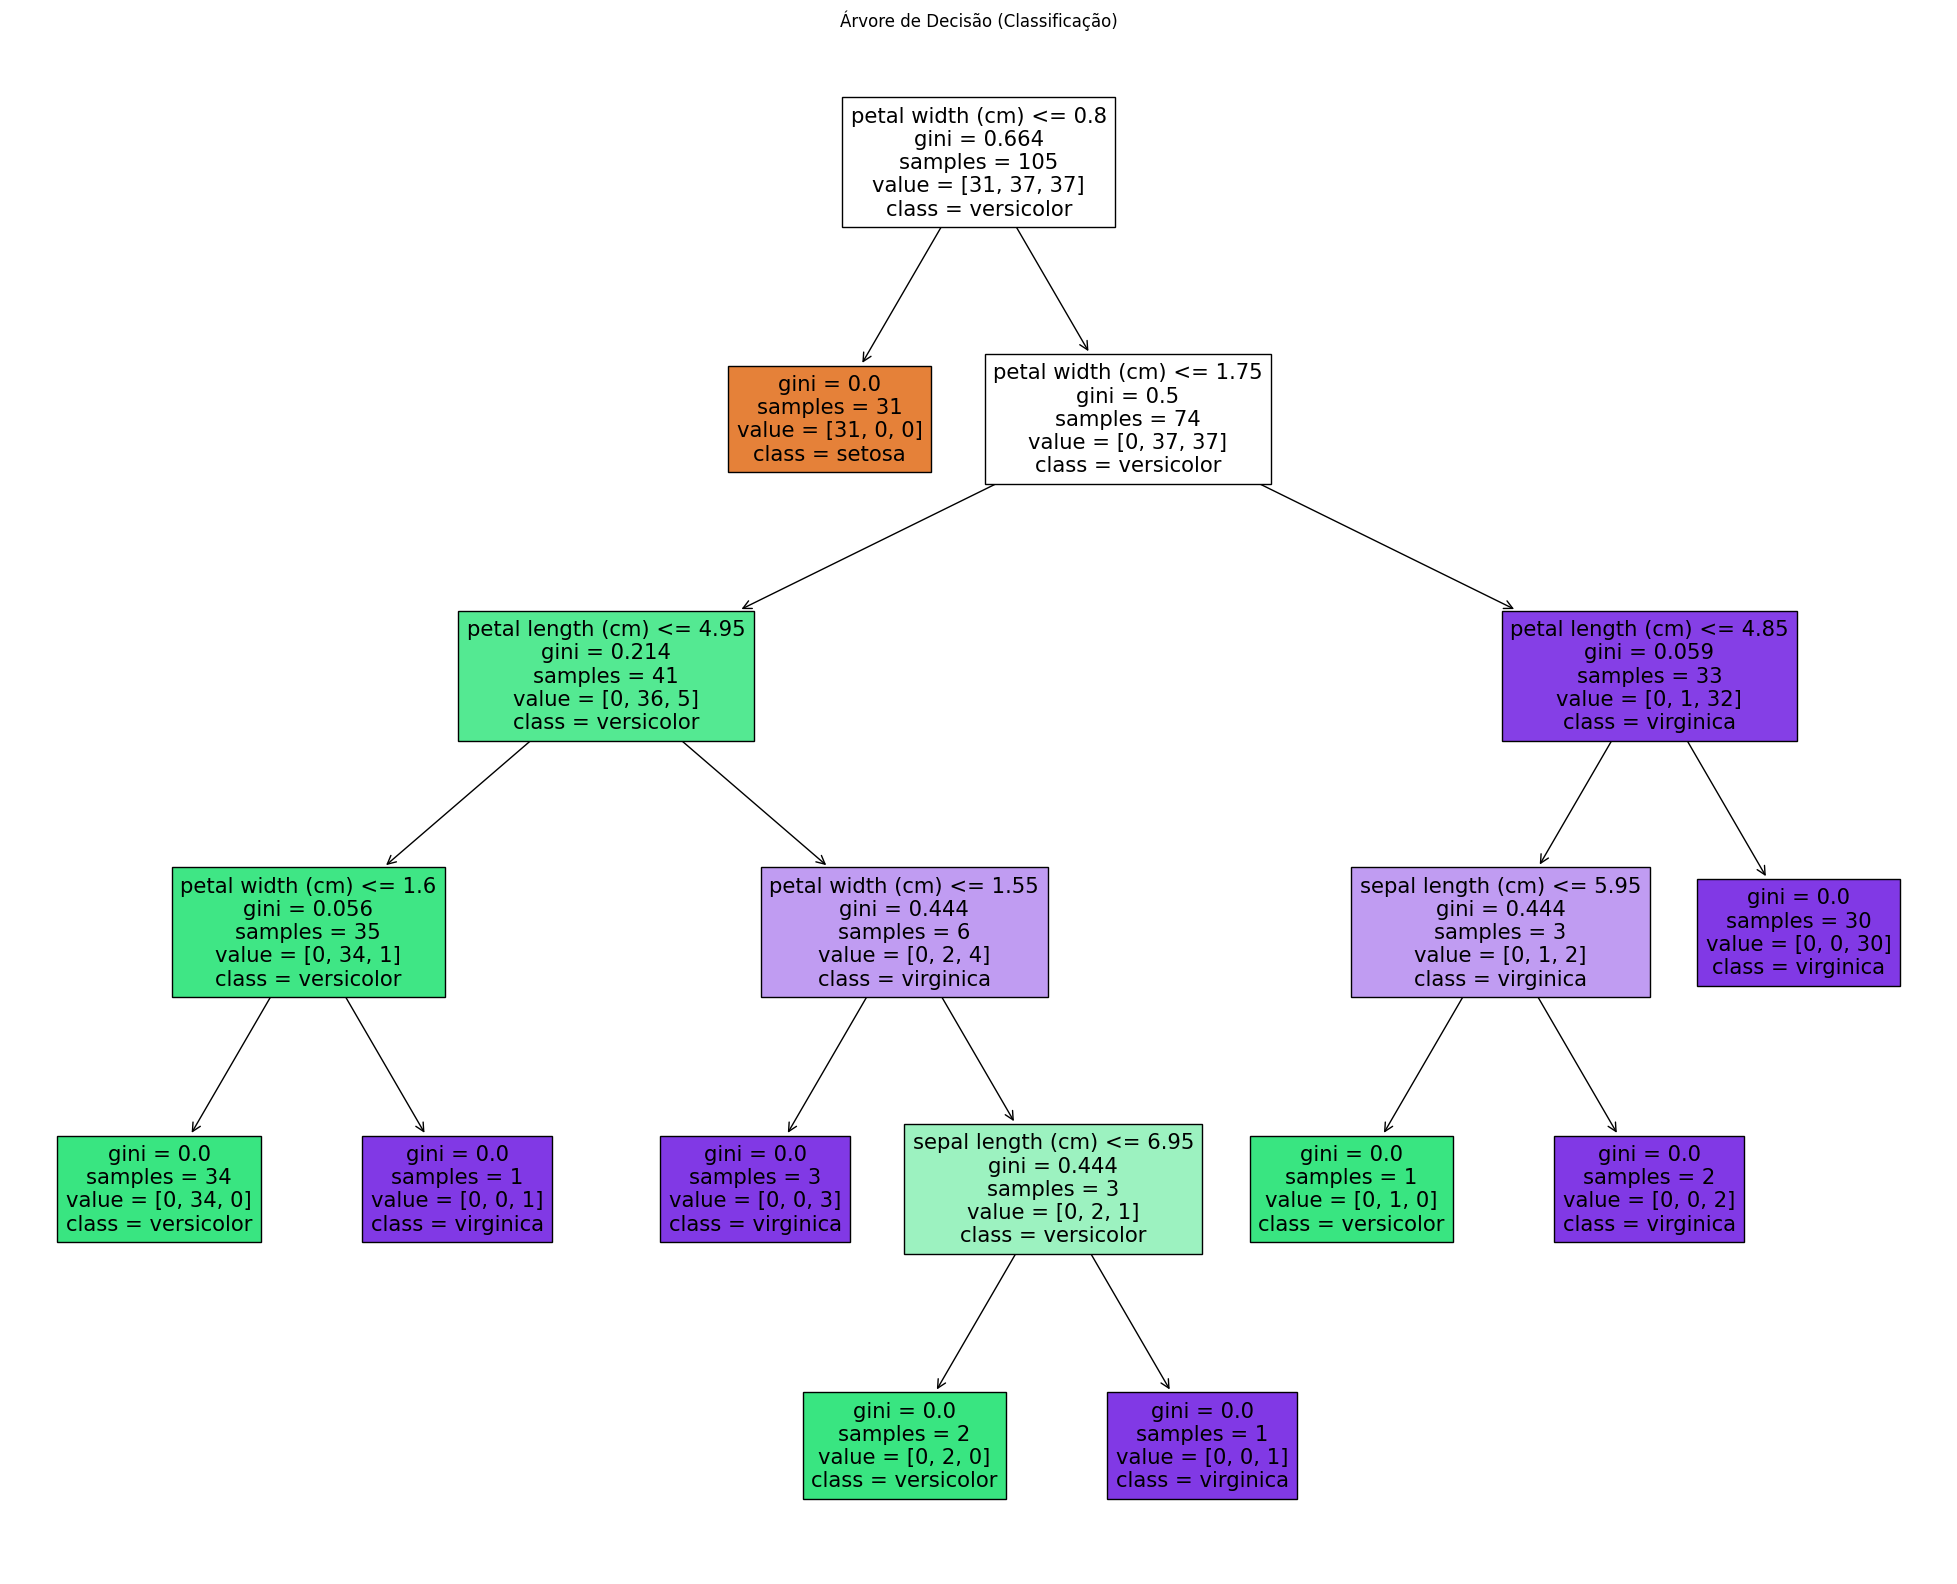

In [ ]:
import matplotlib.pyplot as plt
# Ajustando o tamanho da figura
fig = plt.figure(figsize=(25,20))

# Plotando a estrutura da árvore de decisão
tree.plot_tree(clf,feature_names=iris.feature_names, class_names=iris.target_names.tolist(), filled=True)
plt.title("Árvore de Decisão (Classificação)")
plt.show()

## 3. Aplicação do algoritmo em regressão

* Agora passaremos para o modelo aplicado a regressão, agora os valores a serem previstos serão valores reais.  
Os dados usados serão dados aleátorios contruidos para criar uma gráfico e tentar prever os pontos deste gráfico, abaixo vemos a criação e aplicação do modelo a estes dados.

In [ ]:
# Importando os módulos e bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Criando um dataset aleatório
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # Adicionando ruído

# Ajustando o modelo de regressão com profundidade 5
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X, y)

# Prevendo os valores para um conjunto de teste
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()  # Valores reais para o teste
y_pred_2 = regr_2.predict(X_test)


* Abaixo é posivel ver o gráfico construido a partir destes dados aleátorios.

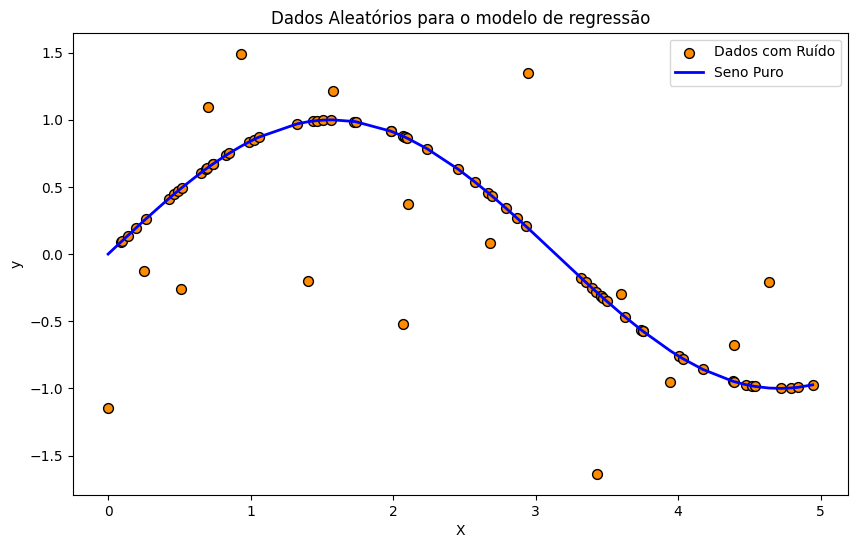

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', edgecolor='black', s=50, label='Dados com Ruído')
plt.plot(X, np.sin(X), color='blue', linewidth=2, label='Seno Puro')
plt.title('Dados Aleatórios para o modelo de regressão')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


* Abaixo observamos as previsões do modelo aos dados de teste e támbem as suas medidas de erro.   
É possivel perceber que o modelo não conseguiu capturar bem o comportamento destes dados e por isso prevê valores de forma errada.

In [ ]:
# Calculando os resíduos
residuos_2 = y_test - y_pred_2

# Criando um DataFrame para armazenar as previsões e os valores reais
predicoes_2 = pd.DataFrame({'Real': y_test, 'Predito': y_pred_2, 'Resíduos': residuos_2})

# Exibindo as primeiras 10 previsões do modelo com profundidade 5
print("Previsões do modelo com profundidade 5:")
print(predicoes_2.head(10))

# Avaliação do modelo usando o erro quadrático médio (MSE)
mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"\nErro Quadrático Médio do modelo com profundidade 5: {mse_2:.2f}")


Previsões do modelo com profundidade 5:
       Real   Predito  Resíduos
0  0.000000 -1.149346  1.149346
1  0.010000 -1.149346  1.159346
2  0.019999 -1.149346  1.169345
3  0.029996 -1.149346  1.179342
4  0.039989 -1.149346  1.189336
5  0.049979  0.078941 -0.028962
6  0.059964  0.078941 -0.018977
7  0.069943  0.078941 -0.008998
8  0.079915  0.078941  0.000974
9  0.089879  0.078941  0.010938

Erro Quadrático Médio do modelo com profundidade 5: 0.14


* Estrtura da árvore de decisão para o modelo de regressão.

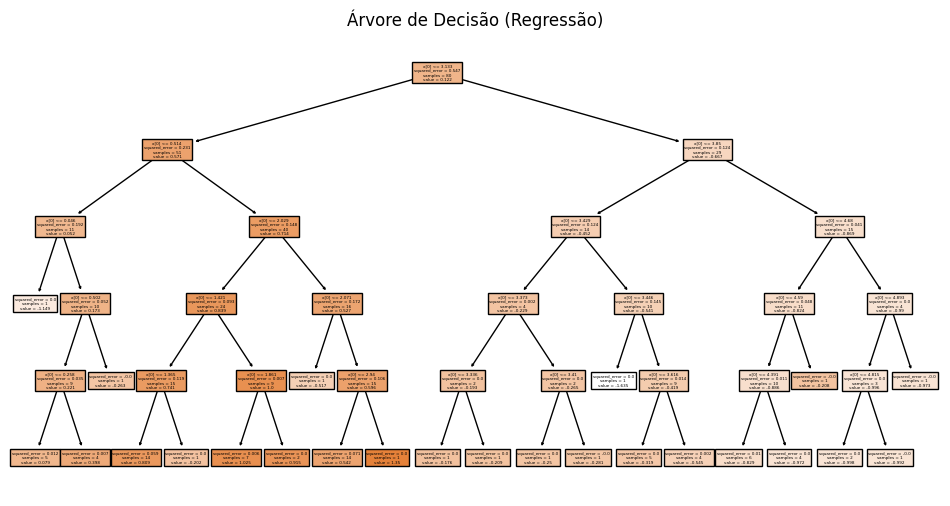

In [ ]:
# Plotando a estrutura da árvore de decisão para o modelo 
plt.figure(figsize=(12, 6))
plot_tree(regr_2, filled=True)
plt.title("Árvore de Decisão (Regressão)")
plt.show()




* Comparação entre a previsão e os dados de forma gráfica

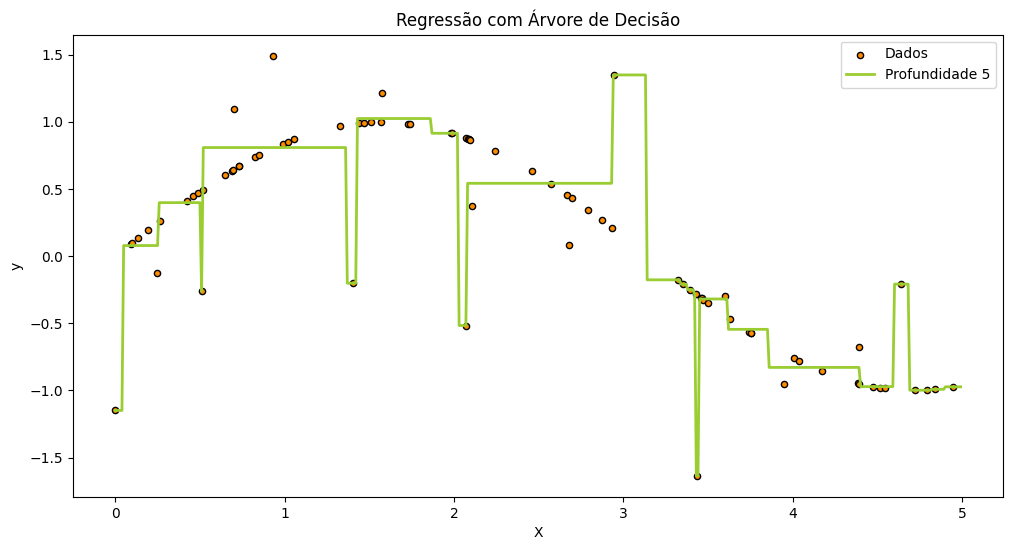

In [ ]:
# Plotando as previsões do modelo
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Dados")
plt.plot(X_test, y_pred_2, color="yellowgreen", label="Profundidade 5", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regressão com Árvore de Decisão")
plt.legend()
plt.show()

## 4. Explicação do modelo de Árvore de Decisão em Series Temporais


* Neste exemplo, vamos demonstrar como uma árvore de decisão pode ser utilizada para prever vendas diárias de um produto em uma loja de varejo. O processo envolve a transformação de dados de séries temporais em um formato que a árvore de decisão possa utilizar efetivamente. Aqui estão os passos detalhados:


## 4.1 Dados de Série Temporal

Suponha que temos um conjunto de dados de vendas diárias de um produto ao longo de um ano. Os dados são apresentados da seguinte forma:

| Data       | Vendas |
|------------|--------|
| 2023-01-01 | 150    |
| 2023-01-02 | 200    |
| 2023-01-03 | 180    |
| ...        | ...    |
| 2023-12-31 | 210    |






## 4.2 Passos para Utilizar uma Árvore de Decisão

1. **Criação de Recursos Temporais:**
   - **Lags:** Inclua valores anteriores da série como atributos. Por exemplo, as vendas dos últimos 3 dias.
   - **Médias Móveis:** Calcule a média das vendas em uma janela de tempo (por exemplo, média móvel de 7 dias).
   - **Datas:** Adicione características da data, como dia da semana, feriados, etc.

   O conjunto de dados transformado pode se parecer com isto:

   | Data       | Vendas | Lag1 | Lag2 | Lag3 | Média7Dias | DiaSemana |
   |------------|--------|------|------|------|------------|-----------|
   | 2023-01-04 | 180    | 200  | 150  | 180  | 176.67     | 3         |
   | 2023-01-05 | 210    | 180  | 200  | 150  | 180.00     | 4         |
   | ...        | ...    | ...  | ...  | ...  | ...        | ...       |

2. **Divisão dos Dados:**
   - Separe os dados em conjuntos de treinamento e teste. Por exemplo, use os dados de janeiro a novembro para treinamento e os de dezembro para teste.

3. **Treinamento da Árvore de Decisão:**
   - Utilize a árvore de decisão para aprender a partir dos dados de treinamento. A variável alvo será a coluna "Vendas", e as preditoras serão as outras colunas.

4. **Previsão:**
   - Use o modelo treinado para prever as vendas nos dados de teste. A árvore de decisão segue os ramos com base nos valores dos atributos até chegar a um nó folha que representa a previsão das vendas.

5. **Avaliação:**
   - Compare as previsões com os valores reais para avaliar o desempenho do modelo usando métricas como RMSE (Root Mean Square Error) ou MAE (Mean Absolute Error).

## 4.3 Funcionamento Interno da Árvore de Decisão

A árvore de decisão funciona dividindo o espaço dos dados em regiões que são homogêneas em termos do valor da variável alvo (neste caso, vendas). Para dados de séries temporais, a árvore de decisão explora as dependências temporais que foram transformadas em atributos, como lag e média móvel.

Por exemplo, se as vendas aumentam significativamente aos sábados, a árvore pode aprender que o atributo "DiaSemana" com valor 6 (sábado) está associado a vendas mais altas e fazer previsões baseadas nisso. Além disso, se um período específico (como a semana antes do Natal) sempre apresenta aumento nas vendas, a árvore pode capturar esse padrão e prever adequadamente as vendas futuras.

A seguir está um exemplo de código em Python que utiliza a biblioteca `scikit-learn` para treinar uma árvore de decisão com dados de séries temporais transformados.